# Деревья решений

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !py -m pip install scipy
# !py -m pip install pydot

# 0. Повторение
![image.png](attachment:image.png)
Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия характеристик этому правилу.
По результату проверки множество экземляров разбивается на два подмножества (соответствующие правилу, не соответствующие правилу).
Процедура повторяется множество раз.
Последний элемент - лист.

Лист:
 - для классификатора: целевой класс;
 - для регрессора: среднее значение в интервале.

Регуляризация дерева:
 - ограничение по максимальной глубине дерева;
 - ограничение на минимальное количество объектов в листе;
 - ограничение на максимальное количество листьев в дереве;
 - требование,улучшения функции качества не менее, чем на n%.


# 1. Деревья решений в sklearn

## 1.1 Demo: Загрузка данных

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt



from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score

%matplotlib inline

Набор данных - Ирисы Фишера (Андерсона)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data[:, 2:] # petal length and width
target_names = iris.target_names
feature_names = iris.feature_names[2:]

y = iris.target

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 1.2 Demo: Деревья. Классификация

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [51]:
from sklearn.tree import DecisionTreeClassifier

# criterion: “gini”, “entropy”, “log_loss”. default=”gini”
tree_clf_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=2, random_state=42)
tree_clf_gini.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica')]

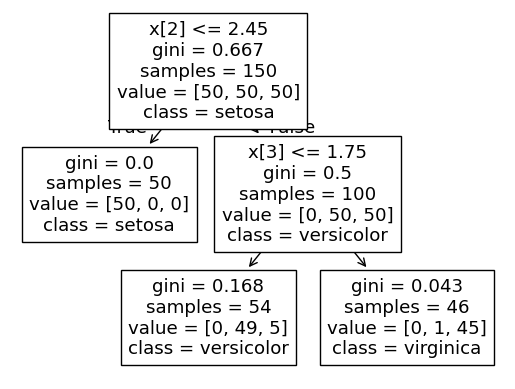

In [52]:
from sklearn import tree
tree.plot_tree(tree_clf_gini, class_names = iris.target_names)

In [53]:
# Task
# criterion: “gini”, “entropy”. default=”gini”
# Задание: постройте и визуализируйте структуру решающего дерева
# для критерия разбиения “entropy"


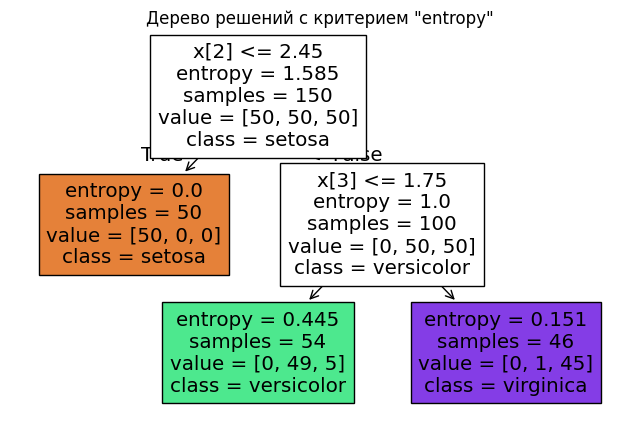

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
tree_clf_entropy.fit(X, y)

plt.figure(figsize=(8, 5))
tree.plot_tree(tree_clf_entropy, class_names=iris.target_names, filled=True)
plt.title('Дерево решений с критерием "entropy"')
plt.show()

## 1.3 Demo: Визуализация обученного дерева

![](https://drive.google.com/uc?export=view&id=1vbHl0PRg3kVOtJGuQmh5uuHCnW6t-uRR)

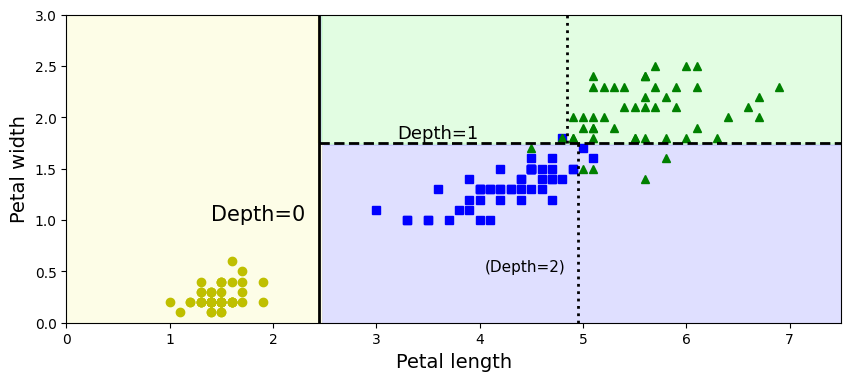

In [9]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(10, 4))
plot_decision_boundary(tree_clf_gini, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## 1.3 Demo: Переобучение
Так как при построении дерева используется принцип жадной максимизации, то дерево достаточно легко переобучить
(предположение о том, что при один раз выбранном решении о разбиении на подмножества, оно гарантированно приведет к наилучшему результату)

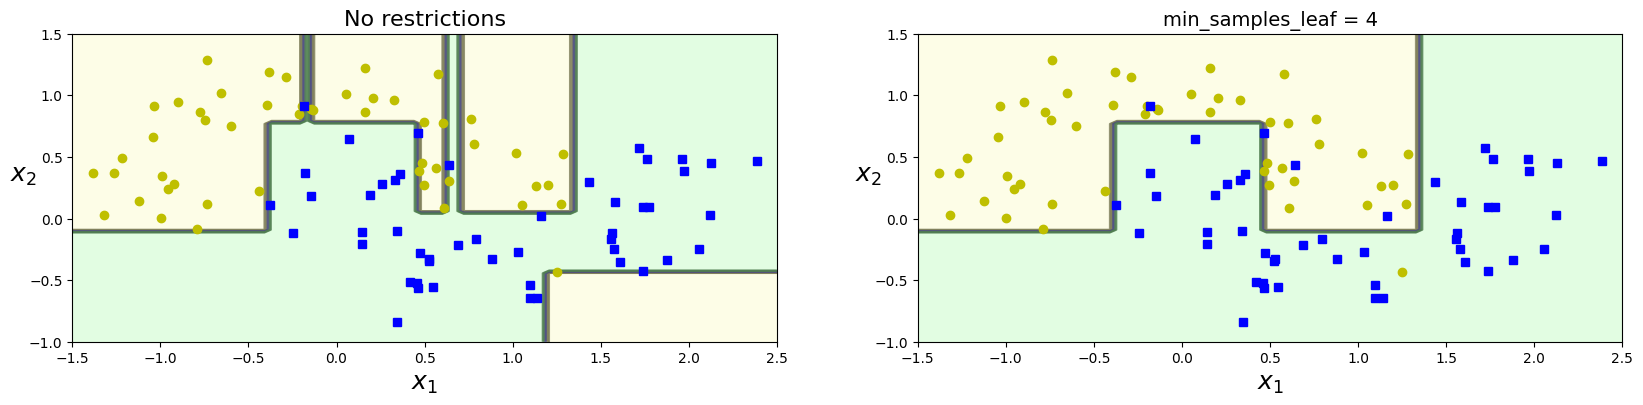

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

## 1.4 Demo: Чувствительность дерева к представлению данных

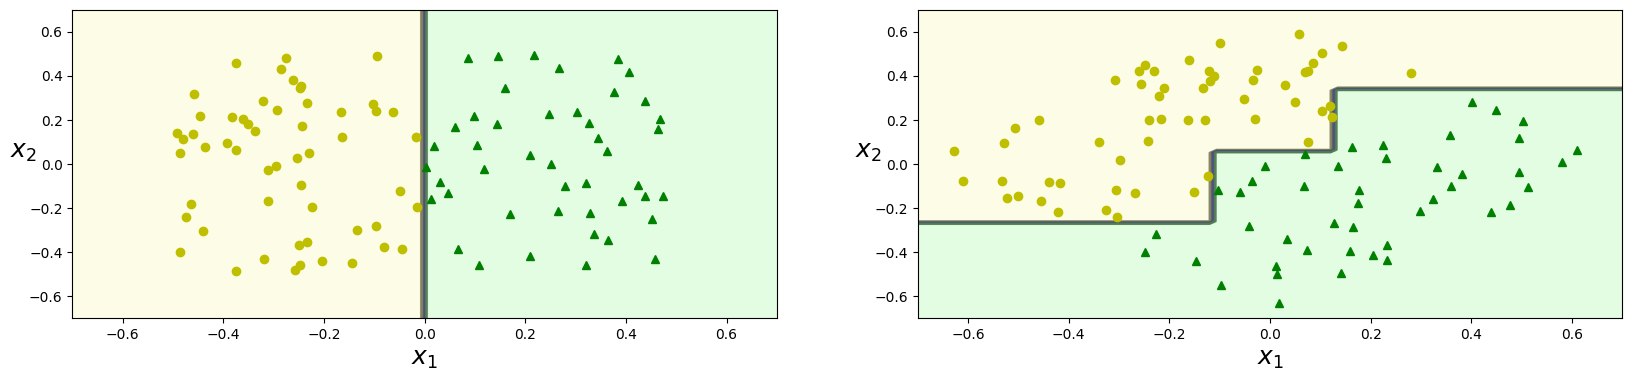

In [11]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

## 1.5 Demo: Деревья. Регрессия

In [12]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

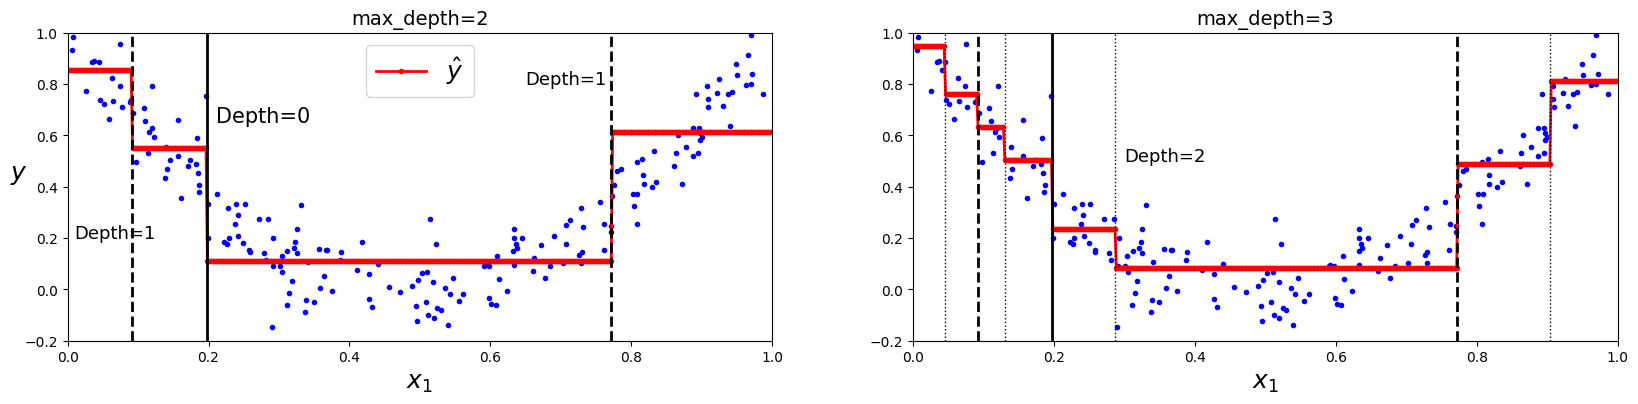

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(20, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

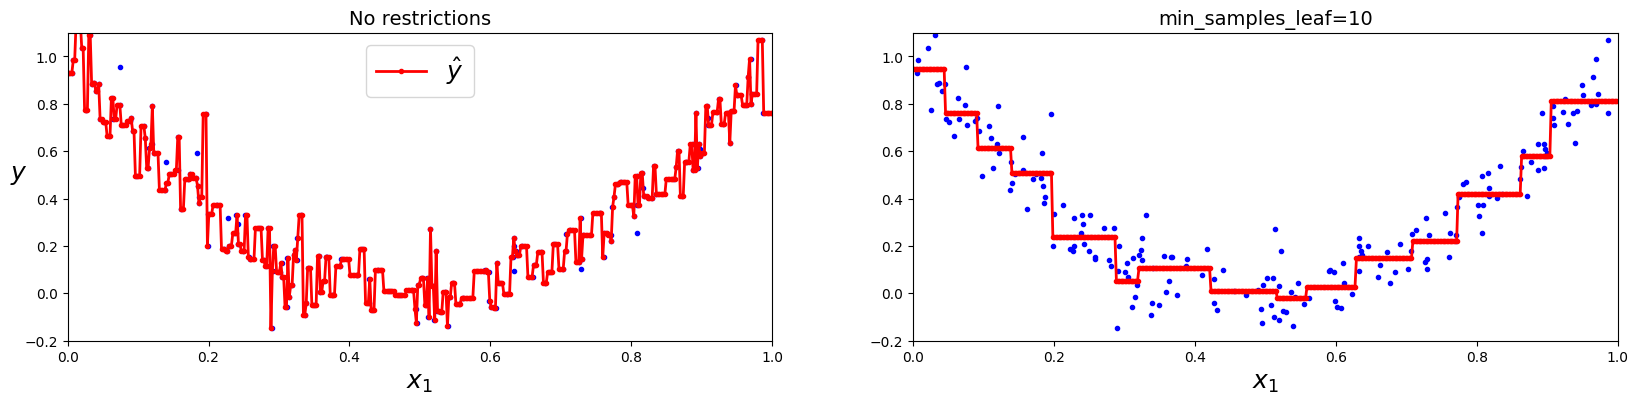

In [15]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(20, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## 1.6 Прикладная задача: предсказание времени задержки

In [16]:
train = pd.read_csv('./departure-delayed/train_features.csv').fillna(0)
# test = pd.read_csv('./departure-delayed/test_features.csv').fillna(0)

In [17]:
y = pd.read_csv('./departure-delayed/train_target.csv', index_col='id')

In [18]:
y[:5]

,DelayTime
id,
0,15.0
1,40.0
2,31.0
3,71.0
4,15.0


Размеры выборок

In [19]:
train.shape, y.shape

((1355730, 13), (1355730, 1))

Посмотрим как выглядят данные

In [20]:
train.head(5)

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,2008,4,23,3,700,907,US,1195,N119US,307.0,PHL,PHX,2075
1,2008,7,18,5,2154,2349,US,401,N637AW,115.0,PHX,SFO,651
2,2008,12,21,7,1921,1949,NW,1767,N782NC,88.0,DTW,MSN,312
3,2008,4,24,4,1955,2020,WN,1865,N272WN,145.0,SAT,PHX,843
4,2008,6,27,5,1700,1848,OH,5186,N804CA,108.0,ORF,CVG,485


Для начала, мы рассмотрим переменные, заданные числами

In [21]:
train.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance
count,1355730.0,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06,1.355730e+06
mean,2008.0,6.110740e+00,1.574999e+01,3.983747e+00,1.467329e+03,1.634319e+03,2.184460e+03,1.342627e+02,7.655388e+02
std,0.0,3.483056e+00,8.777616e+00,1.996024e+00,4.248367e+02,4.644701e+02,1.944718e+03,7.133404e+01,5.745182e+02
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.200000e+01,1.100000e+01
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.325000e+03,6.100000e+02,8.200000e+01,3.380000e+02
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.705000e+03,1.543000e+03,1.160000e+02,6.060000e+02
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.015000e+03,3.422000e+03,1.650000e+02,9.980000e+02
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,9.741000e+03,6.600000e+02,4.962000e+03


In [22]:
# Проверим, прежде чем выкидывать признак:
print("Значений признака 'year' в трейне " ,  train['Year'].nunique())
# print("Значений признака 'year' в тесте " ,  test['Year'].nunique())

Значений признака 'year' в трейне  1


Итак, какие выводы мы можем сделать?
1. Признак `year` не несет вариативности в данные - удалим его
2. Признаки `Month`, `DayofMonth`, `DayOfWeek` скорее всего можно рассматривать как категориальные

In [23]:
train.drop('Year', axis=1, inplace=True)
# test.drop('Year', axis=1, inplace=True)

In [24]:
types = train.dtypes
real_cols = list(types[types != 'object'].index.values)
cat_cols = list(types[types == 'object'].index.values)
types

,0
Month,int64
DayofMonth,int64
DayOfWeek,int64
CRSDepTime,int64
CRSArrTime,int64
UniqueCarrier,object
FlightNum,int64
TailNum,object
CRSElapsedTime,float64
Origin,object


##### Разделение тренировочной выборки на тренировочную и валидационную

In [25]:
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=42)

In [26]:
from sklearn.metrics import mean_absolute_error
dt = DecisionTreeRegressor()
dt.fit(x_train[real_cols], y_train)
mse_train = mean_absolute_error(dt.predict(x_train[real_cols]), y_train)
mse_val = mean_absolute_error(dt.predict(x_val[real_cols]), y_val)
print(mse_train, mse_val)

0.0 43.4894521770559


Регуляризация дерева: по глубине и количеству экземпляру в листьях

In [27]:
mse_train = []
mse_val = []

for i in range(20):
    dt = DecisionTreeRegressor(max_depth=i*5+1, min_samples_leaf=1000)
    dt.fit(x_train[real_cols], y_train)
    mse_train = np.append(mse_train, mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mse_val = np.append(mse_val, mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

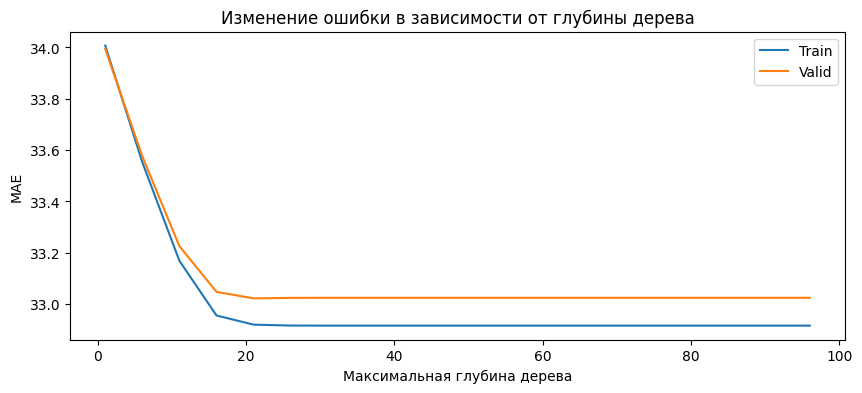

In [28]:
plt.figure(figsize=(10, 4))
plt.title('Изменение ошибки в зависимости от глубины дерева')

plt.plot([i*5 + 1 for i in range(20)], mse_train, label='Train')
plt.plot([i*5 + 1 for i in range(20)], mse_val, label='Valid')
plt.legend()
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MAE')
plt.show()

In [29]:
# обучите серию классификаторов без регуляризации по минимальному количеству экземпляров в листе.
# визуализируйте MAE

In [30]:
# обучите дерево с наилучшими параметрами из предыдущего примера
best_dt = DecisionTreeRegressor(max_depth=21, min_samples_leaf=1000)
best_dt.fit(x_train[real_cols], y_train)


DecisionTreeRegressor(max_depth=21, min_samples_leaf=1000)

#Домашка к пункту 1.6

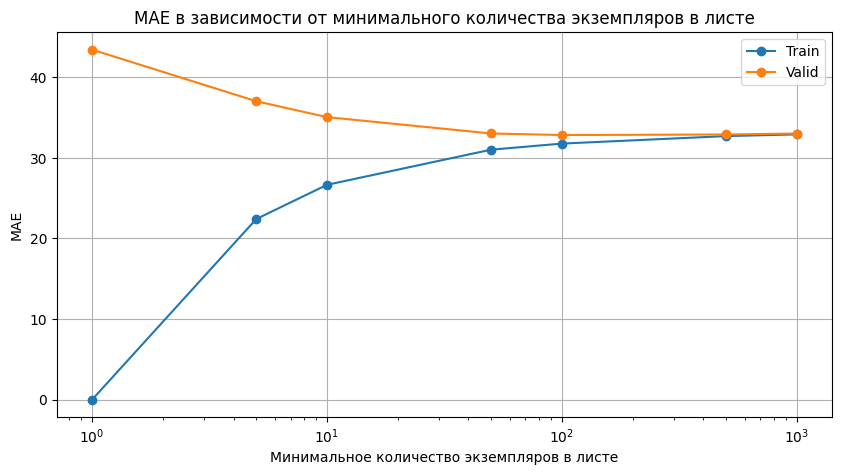

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Загрузка данных
train = pd.read_csv('./departure-delayed/train_features.csv').fillna(0)
y = pd.read_csv('./departure-delayed/train_target.csv', index_col='id')

# Удаление признака Year
train.drop('Year', axis=1, inplace=True)

# Разделение на тренировочную и валидационную выборки
x_train, x_val, y_train, y_val = train_test_split(train, y, train_size=0.8, test_size=0.2, random_state=42)

# Обучение дерева с различными значениями min_samples_leaf
min_samples_leaf_values = [1, 5, 10, 50, 100, 500, 1000]
mae_train = []
mae_val = []

for min_samples in min_samples_leaf_values:
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples)
    dt.fit(x_train[real_cols], y_train)
    mae_train.append(mean_absolute_error(dt.predict(x_train[real_cols]), y_train))
    mae_val.append(mean_absolute_error(dt.predict(x_val[real_cols]), y_val))

# Визуализация MAE
plt.figure(figsize=(10, 5))
plt.title('MAE в зависимости от минимального количества экземпляров в листе')
plt.plot(min_samples_leaf_values, mae_train, label='Train', marker='o')
plt.plot(min_samples_leaf_values, mae_val, label='Valid', marker='o')
plt.legend()
plt.xlabel('Минимальное количество экземпляров в листе')
plt.ylabel('MAE')
plt.xscale('log')  # Логарифмическая шкала для лучшего восприятия
plt.grid()
plt.show()


In [58]:
# Обучение дерева с наилучшими параметрами
best_dt = DecisionTreeRegressor(max_depth=21, min_samples_leaf=1000)
best_dt.fit(x_train[real_cols], y_train)

# Оценка MAE на валидационной выборке
mae_best = mean_absolute_error(best_dt.predict(x_val[real_cols]), y_val)
print(f'MAE на валидационной выборке с наилучшими параметрами: {mae_best}')


MAE на валидационной выборке с наилучшими параметрами: 33.02198247215921


# 2. Ансамбли
## 2.1 Out of Bag Error

In [31]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate random data
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_classes=2,
                           random_state=0)

clf = RandomForestClassifier(n_estimators=100,
                             oob_score=True,
                             random_state=0)
clf.fit(X, y)

oob_error = 1 - clf.oob_score_

print(f'OOB error: {oob_error:.3f}')

OOB error: 0.044


## 2.2 Bagging

In [32]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [33]:
bag_of_trees = BaggingRegressor(best_dt, n_estimators=5, random_state=42)

In [34]:
bag_of_trees.fit(x_train[real_cols], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=21,
                                                 min_samples_leaf=1000),
                 n_estimators=5, random_state=42)

In [35]:
bag_mse_val = mean_absolute_error(bag_of_trees.predict(x_val[real_cols]), y_val)
bag_mse_val

33.02407774271013

In [36]:
bag_mse_train = mean_absolute_error(bag_of_trees.predict(x_train[real_cols]), y_train)
bag_mse_train

32.94950889166761

In [37]:
# Задача: выбрать оптимальное количество регрессоров, оптимальные параметры для Bagging Regressor

# Домашка к 2.2

In [65]:
# Убедитесь, что y - это одномерный массив
y_train_flat = y_train.values.ravel()

# Определение параметров для поиска
param_grid = {
    'n_estimators': [4, 6, 8, 10],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0]
}

# Создание модели с правильным параметром
bagging_regressor = BaggingRegressor(estimator=best_dt, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(bagging_regressor, param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(x_train[real_cols], y_train_flat)

# Оптимальные параметры
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший MAE на валидационной выборке: {best_mae}')


Лучшие параметры: {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 8}
Лучший MAE на валидационной выборке: 33.11377260514818


## 2.3 Random Forest

In [38]:
# Задача: обучить, выявить оптимальное количество моделей в регрессоре, оптимальные параметры для регрессора
forest = RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=42, criterion='squared_error', max_depth=9)
forest.fit(x_train[real_cols], y_train)
rf_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
rf_mse_val

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


33.21772406454778

# Домашка к пункту 2.3

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Обучение модели с фиксированным количеством деревьев
forest = RandomForestRegressor(n_estimators=5, n_jobs=-1, random_state=42, criterion='squared_error', max_depth=9)
forest.fit(x_train[real_cols], y_train.values.ravel())  # Убедитесь, что y одномерный
rf_mse_val = mean_absolute_error(forest.predict(x_val[real_cols]), y_val)
print(f'MAE на валидационной выборке: {rf_mse_val}')


MAE на валидационной выборке: 33.21772406454778


In [67]:
from sklearn.model_selection import GridSearchCV

# Определение параметров для поиска
param_grid = {
    'n_estimators': [4, 6, 8, 10],
    'max_depth': [None, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Создание модели
forest_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

# GridSearchCV
grid_search = GridSearchCV(forest_regressor, param_grid, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
grid_search.fit(x_train[real_cols], y_train.values.ravel())

# Оптимальные параметры
best_params = grid_search.best_params_
best_mae = -grid_search.best_score_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший MAE на валидационной выборке: {best_mae}')


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
48 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", l

Лучшие параметры: {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 8}
Лучший MAE на валидационной выборке: 33.39800170180205
